In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#1. Explanatory Data Analysis
application = pd.read_csv("application_record.csv")
application.columns = map(str.lower, application.columns)
application.head()

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [3]:
credit = pd.read_csv("credit_record.csv")
credit.columns = map(str.lower, credit.columns)
credit.head()

,id,months_balance,status
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [4]:
#Convert status column to numeric
credit.status = credit.status.replace({'X':-2, 'C': -1})
credit.status = credit.status.astype('int')
credit.status = credit.status.apply(lambda x:x+1)

In [5]:
#Find the latest month
credit_month = credit.groupby('id').months_balance.max().reset_index()
credit_month.head()

,id,months_balance
0,5001711,0
1,5001712,0
2,5001713,0
3,5001714,0
4,5001715,0


In [6]:
#Merge the df with latest months matched with its status
record = pd.merge(credit_month, credit, how="inner", on=["id", "months_balance"])
record.head()

,id,months_balance,status
0,5001711,0,-1
1,5001712,0,0
2,5001713,0,-1
3,5001714,0,-1
4,5001715,0,-1


In [7]:
#Merge the record df with application df

In [8]:
df = pd.merge(application, record, on="id", how="inner")
df.head()

,id,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,name_income_type,name_education_type,name_family_status,name_housing_type,days_birth,days_employed,flag_mobil,flag_work_phone,flag_phone,flag_email,occupation_type,cnt_fam_members,months_balance,status
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-22,-1


In [9]:
#Rename columns
df = df.rename(columns={'code_gender':'gender',
                   'flag_own_car':'car',
                   'flag_own_realty':'property',
                   'cnt_children':'children',
                   'amt_income_total':'annual_income',
                   'name_income_type':'income_type',
                   'name_education_type':'education',
                   'name_family_status':'family_status',
                   'name_housing_type':'housing_type',
                   'days_birth':'birth_date',
                   'days_employed':'employment',
                   'flag_mobil':'mobile_phone',
                   'flag_work_phone':'work_phone',
                   'flag_phone':'phone',
                   'flag_email': 'email',
                   'cnt_fam_members':'fam_members'
                   })
df.head()

,id,gender,car,property,children,annual_income,income_type,education,family_status,housing_type,birth_date,employment,mobile_phone,work_phone,phone,email,occupation_type,fam_members,months_balance,status
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-22,-1


In [10]:
#Check null values
df.isnull().sum()

id                     0
gender                 0
car                    0
property               0
children               0
annual_income          0
income_type            0
education              0
family_status          0
housing_type           0
birth_date             0
employment             0
mobile_phone           0
work_phone             0
phone                  0
email                  0
occupation_type    11323
fam_members            0
months_balance         0
status                 0
dtype: int64

In [11]:
#Fill null values
df.occupation_type = df.occupation_type.fillna("Others")

In [12]:
#Transform birth_date and employment to positive numbers
df['age'] = df.birth_date.apply(lambda x: round(x/-365,0))
df['year_of_employment'] = df.employment.apply(lambda x: round(x/-365,0) if x<0 else 0)

df = df.drop(columns=["birth_date","employment"])

In [13]:
df.head()

,id,gender,car,property,children,annual_income,income_type,education,family_status,housing_type,mobile_phone,work_phone,phone,email,occupation_type,fam_members,months_balance,status,age,year_of_employment
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,Others,2.0,0,0,33.0,12.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,1,1,0,0,Others,2.0,0,0,33.0,12.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2.0,0,0,59.0,3.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,0,1,52.0,8.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,-22,-1,52.0,8.0


In [14]:
df.describe()

,id,children,annual_income,mobile_phone,work_phone,phone,email,fam_members,months_balance,status,age,year_of_employment
count,3.645700e+04,36457.000000,3.645700e+04,36457.0,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.000000,36457.00000
mean,5.078227e+06,0.430315,1.866857e+05,1.0,0.225526,0.294813,0.089722,2.198453,-5.831802,-0.002716,43.777382,6.03810
std,4.187524e+04,0.742367,1.017892e+05,0.0,0.417934,0.455965,0.285787,0.911686,11.326494,0.783104,11.519211,6.48948
min,5.008804e+06,0.000000,2.700000e+04,1.0,0.000000,0.000000,0.000000,1.000000,-60.000000,-1.000000,21.000000,0.00000
25%,5.042028e+06,0.000000,1.215000e+05,1.0,0.000000,0.000000,0.000000,2.000000,-6.000000,-1.000000,34.000000,1.00000
50%,5.074614e+06,0.000000,1.575000e+05,1.0,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,43.000000,4.00000
75%,5.115396e+06,1.000000,2.250000e+05,1.0,0.000000,1.000000,0.000000,3.000000,0.000000,0.000000,53.000000,9.00000
max,5.150487e+06,19.000000,1.575000e+06,1.0,1.000000,1.000000,1.000000,20.000000,0.000000,6.000000,69.000000,43.00000


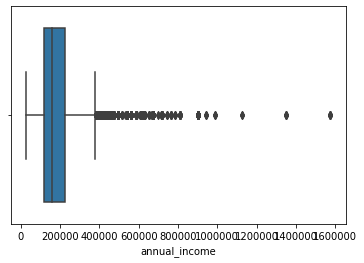

In [15]:
#Detect and remove outliers: Annual_income

sns.boxplot(df.annual_income)

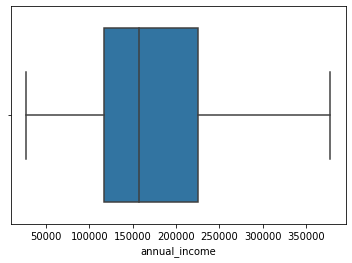

In [17]:
#Option: Z-score or IQR, z-score only for Gaugassian distribution => IQR

def remove_outlier(col):
    q25 = col.quantile(0.25)
    q75 = col.quantile(0.75)
    iqr = q75 - q25
    cutoff = iqr*1.5
    lower = q25 - cutoff
    upper = q75 + cutoff
    return lower, upper

lower, upper = remove_outlier(df.annual_income)

df = df.loc[(df.annual_income > lower) & (df.annual_income < upper)]

sns.boxplot(df.annual_income)

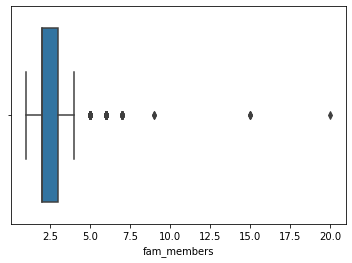

In [18]:
#Detect and remove outliers: Fam_members

sns.boxplot(df.fam_members)

2.0    18729
1.0     6721
3.0     6057
4.0     2976
Name: fam_members, dtype: int64

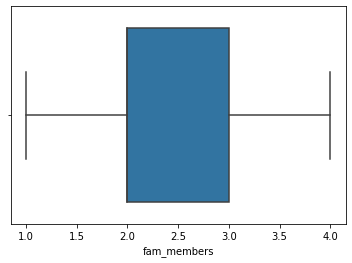

In [19]:
remove_outlier(df.fam_members)

df = df.loc[(df.fam_members>0.5) & (df.fam_members <4.5)]

sns.boxplot(df.fam_members)

df.fam_members.value_counts()

In [20]:
df.head()

,id,gender,car,property,children,annual_income,income_type,education,family_status,housing_type,mobile_phone,work_phone,phone,email,occupation_type,fam_members,months_balance,status,age,year_of_employment
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,1,0,0,0,Security staff,2.0,0,0,59.0,3.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,0,1,52.0,8.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,-22,-1,52.0,8.0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,0,0,52.0,8.0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1,0,1,1,Sales staff,1.0,0,0,52.0,8.0


In [21]:
#Define target variable
df.status.value_counts()

 0    17052
-1     9079
 1     7997
 2      262
 6       64
 3       18
 4        6
 5        5
Name: status, dtype: int64

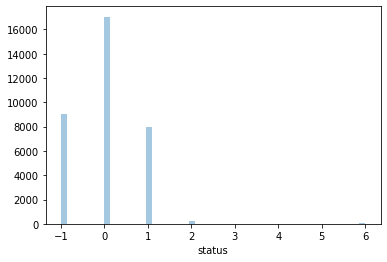

In [22]:
sns.distplot(df.status, kde=False)

In [23]:
#Target = 1 if status >=1 (with due debt), else Target = 0
df['target'] = None
df.loc[df.status < 1,'target']=0
df.loc[df.status >= 1,'target']=1
df.target = pd.to_numeric(df.target)
df.head()

,id,gender,car,property,children,annual_income,income_type,education,family_status,housing_type,...,work_phone,phone,email,occupation_type,fam_members,months_balance,status,age,year_of_employment,target
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,0,0,0,Security staff,2.0,0,0,59.0,3.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,0,1,52.0,8.0,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,-22,-1,52.0,8.0,0
5,5008810,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,0,0,52.0,8.0,0
6,5008811,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,0,1,1,Sales staff,1.0,0,0,52.0,8.0,0


In [24]:
#Drop unnecessary columns
df.drop(columns=['months_balance', 'status', 'mobile_phone'],inplace=True)

In [25]:
#Convert object dtype to category dtype for feature processing
for i in df.columns:
    if df[i].dtype == 'object':
        df[i] = df[i].astype('category')

df.dtypes

id                       int64
gender                category
car                   category
property              category
children                 int64
annual_income          float64
income_type           category
education             category
family_status         category
housing_type          category
work_phone               int64
phone                    int64
email                    int64
occupation_type       category
fam_members            float64
age                    float64
year_of_employment     float64
target                   int64
dtype: object

In [26]:
#2. Feature engineering

In [27]:
#Category encoding
#2.1. Encoding without using the target variable (no independent variables are impacted prior to modeling)
#2.1.1. Binary variable: LabelEncoder, Binarizer
#2.1.2. Nominal variable: using mean or mode // Dummy Coding or OneHotEncoder (<5 values/variable)
#2.1.3. Continous variable: binning with Fixed-width and Adaptive Binning, then apply mean/mode


#2.2. Encoding in relation to the target variable
#2.2.1. WOE Encoder (to pair with IV): apply to the entire dataset
#2.2.2. Compare with Target Encoder/LOO

In [28]:
df_a = df #for 2.1. encoding without target

In [29]:
df_b = df #for 2.2. encoding with 

In [30]:
#Pre-requisite: train test split to avoid data leakage

x_a = df_a.iloc[:, 1:-1]
y_a = df_a.iloc[:, -1]

from sklearn.model_selection import train_test_split

x_a_train, x_a_test, y_a_train, y_a_test = train_test_split(x_a, y_a, test_size=0.3, random_state=1)

In [31]:
#2.1. Encoding WITHOUT target (using df_a)

In [32]:
#2.1.1 Binary variables: gender, car, property

#Option 1: Label Encoder (applied to >2 categories per variable)
from sklearn.preprocessing import LabelEncoder, LabelBinarizer

le = LabelEncoder()
gender_le = le.fit_transform(x_a_train.gender)

#Option 2: LabelBinarizer (applied to 2 categories per variable only)
bn = LabelBinarizer()

gender_bn = np.array(x_a_train.gender).reshape(-1,1)
gender_bn = bn.fit_transform(gender_bn)

#Apply to x_train and x_test

x_a_train.loc[:, 'gender'] = le.fit_transform(x_a_train.loc[:, 'gender'])
x_a_train.loc[:, 'car'] = le.fit_transform(x_a_train.loc[:, 'car'])
x_a_train.loc[:, 'property'] = le.fit_transform(x_a_train.loc[:, 'property'])

x_a_test.loc[:, 'gender'] = le.fit_transform(x_a_test.loc[:, 'gender'])
x_a_test.loc[:, 'car'] = le.fit_transform(x_a_test.loc[:, 'car'])
x_a_test.loc[:, 'property'] = le.fit_transform(x_a_test.loc[:, 'property'])

/opt/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [33]:
#2.1.2. Nominal variables: income_type, education, family_status, housing_type, occupation_type

#Option 1: Dummy Coding: kn - k variables

income_type_dummy = pd.get_dummies(x_a_train.income_type)
print(income_type_dummy)

#Option 2: OneHotEcnoder: kn variables

from sklearn.preprocessing import OneHotEncoder

onehot = OneHotEncoder(sparse=False, drop='first', handle_unknown='error')
income_type_onehot = onehot.fit_transform(x_a_train.income_type.to_numpy().reshape(-1,1))
income_type_onehot = pd.DataFrame(income_type_onehot, columns=onehot.get_feature_names(['income_type']))
income_type_onehot.head()

#As OneHotEncoder of sklearn was designed to keep the consistency in the number of categories across train and
#test set, so we can control any category which doesn't appear in train set with "handle_unknown="error""

#Apply for x_train set

nominal = onehot.fit_transform(x_a_train[['income_type', 'education', 'family_status', 'housing_type', 
                                             'occupation_type']])
df_nominal = pd.DataFrame(index=x_a_train.index, data=nominal, columns=onehot.get_feature_names(['income_type', 'education', 'family_status',
                                                                        'housing_type', 'occupation_type']))
x_a_train = pd.concat([x_a_train, df_nominal], axis=1)
x_a_train.drop(columns=['income_type', 'education', 'family_status', 'housing_type', 'occupation_type'], inplace=True)
x_a_train.shape


       Commercial associate  Pensioner  State servant  Student  Working
25003                     0          1              0        0        0
34848                     0          1              0        0        0
13418                     1          0              0        0        0
13885                     0          0              0        0        1
26023                     0          0              0        0        1
...                     ...        ...            ...      ...      ...
8257                      0          1              0        0        0
34349                     0          0              0        0        1
5489                      0          1              0        0        0
12808                     0          0              0        0        1
34865                     1          0              0        0        0

[24138 rows x 5 columns]


(24138, 46)

In [34]:
#Apply for x_test set

nominal_test = onehot.fit_transform(x_a_test[['income_type', 'education', 'family_status', 'housing_type', 
                                             'occupation_type']])
df_nominal_test = pd.DataFrame(index=x_a_test.index, data=nominal_test, columns=onehot.get_feature_names(['income_type', 'education', 'family_status',
                                                                        'housing_type', 'occupation_type']))
x_a_test = pd.concat([x_a_test, df_nominal_test], axis=1)
x_a_test.drop(columns=['income_type', 'education', 'family_status', 'housing_type', 'occupation_type'], inplace=True)
x_a_test.head()

,gender,car,property,children,annual_income,work_phone,phone,email,fam_members,age,...,occupation_type_Low-skill Laborers,occupation_type_Managers,occupation_type_Medicine staff,occupation_type_Others,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff
7293,0,0,1,0,157500.0,0,1,1,2.0,50.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
25145,1,0,0,0,180000.0,1,1,0,2.0,53.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18640,1,1,1,0,202500.0,0,1,0,2.0,46.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
23707,0,0,0,0,67500.0,0,0,0,1.0,61.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2403,0,0,1,0,157500.0,0,0,1,2.0,56.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


(array([12767.,  5353.,  2842.,  1624.,   640.,   412.,   304.,   115.,
           49.,    32.]),
 array([ 0. ,  4.3,  8.6, 12.9, 17.2, 21.5, 25.8, 30.1, 34.4, 38.7, 43. ]),
 <a list of 10 Patch objects>)

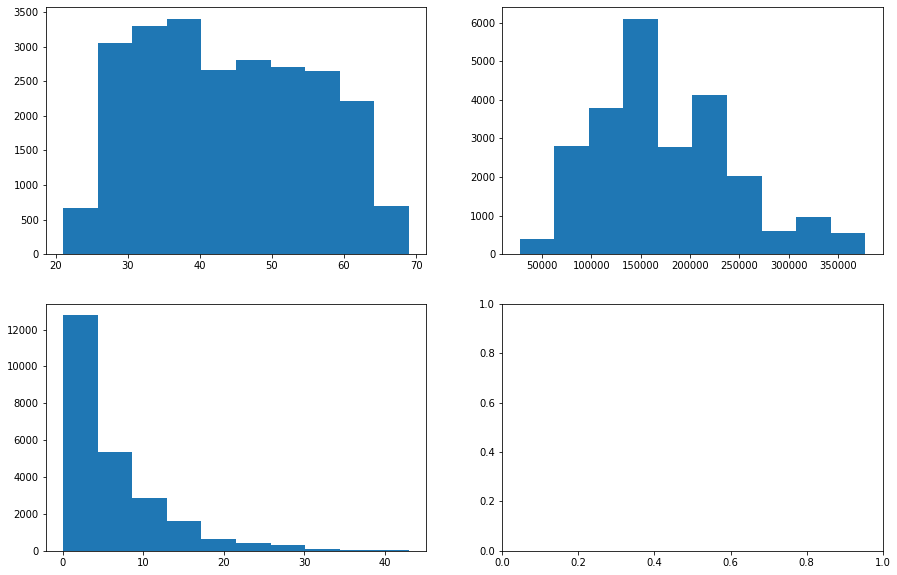

In [35]:
#2.1.3. Continuous variables: annual_income, age, year_of_employment

fig, ax = plt.subplots(2,2,figsize=(15,10))

ax[0][0].hist(x_a_train.age)
ax[0][1].hist(x_a_train.annual_income)
ax[1][0].hist(x_a_train.year_of_employment)

In [36]:
#Option: Fixed-width binning (rounding) or Adaptive binning (quantiles)
#Here, we apply adaptive binning since fixed-width binning requires pre-defining the bins (which is subjective)

#Apply to x_train set

x_a_train['age_binned'] = pd.qcut(x_a_train.age, q=[0, .25, .50, .75, 1])
x_a_train['annual_income_binned'] = pd.qcut(x_a_train.annual_income, q=[0, .25, .50, .75, 1])
x_a_train['year_of_employment_binned'] = pd.qcut(x_a_train.year_of_employment, q=[0, .25, .50, .75, 1])

x_a_train.drop(columns=['age', 'annual_income', 'year_of_employment'], inplace=True)

#Since each category is divided into 5 equal bins, we can apply Label Encoder without bias

x_a_train['age'] = le.fit_transform(x_a_train['age_binned'])
x_a_train['annual_income'] = le.fit_transform(x_a_train['annual_income_binned'])
x_a_train['year_of_employment'] = le.fit_transform(x_a_train['year_of_employment_binned'])

x_a_train.drop(columns=['age_binned','annual_income_binned', 'year_of_employment_binned'],inplace=True)

x_a_train.head()

,gender,car,property,children,work_phone,phone,email,fam_members,income_type_Pensioner,income_type_State servant,...,occupation_type_Others,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,age,annual_income,year_of_employment
25003,0,1,0,0,0,1,0,2.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0
34848,0,0,0,0,0,0,0,2.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0
13418,0,1,1,2,0,0,0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1,1
13885,1,1,1,0,1,1,0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1,2
26023,0,0,0,0,0,0,0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0,0,2


In [37]:
#Apply to x_test set

x_a_test['age_binned'] = pd.qcut(x_a_test.age, q=[0, .25, .50, .75, 1])
x_a_test['annual_income_binned'] = pd.qcut(x_a_test.annual_income, q=[0, .25, .50, .75, 1])
x_a_test['year_of_employment_binned'] = pd.qcut(x_a_test.year_of_employment, q=[0, .25, .50, .75, 1])

x_a_test.drop(columns=['age', 'annual_income', 'year_of_employment'], inplace=True)

#Since each category is divided into 5 equal bins, we can apply Label Encoder without bias

x_a_test['age'] = le.fit_transform(x_a_test['age_binned'])
x_a_test['annual_income'] = le.fit_transform(x_a_test['annual_income_binned'])
x_a_test['year_of_employment'] = le.fit_transform(x_a_test['year_of_employment_binned'])

x_a_test.drop(columns=['age_binned','annual_income_binned', 'year_of_employment_binned'],inplace=True)

x_a_test.head()

,gender,car,property,children,work_phone,phone,email,fam_members,income_type_Pensioner,income_type_State servant,...,occupation_type_Others,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,age,annual_income,year_of_employment
7293,0,0,1,0,0,1,1,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,1,1
25145,1,0,0,0,1,1,0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,3
18640,1,1,1,0,0,1,0,2.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2,2,0
23707,0,0,0,0,0,0,0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,0,0
2403,0,0,1,0,0,0,1,2.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3,1,0


In [38]:
#2.2. Encoding WITH target (using df_b)

#Pre-requisite: train test split to avoid data leakage

x_b = df_b.iloc[:, 1:-1]
y_b = df_b.iloc[:, -1]

from sklearn.model_selection import train_test_split

x_b_train, x_b_test, y_b_train, y_b_test = train_test_split(x_b, y_b, test_size=0.3, random_state=1)

In [39]:
#3 Options: WOE Encoder, Target Encoder or LOO

#Option 1: WOE Encoder
import category_encoders as ce

woe = ce.WOEEncoder()

def woe_encoder(col, target):
    for i in range(len(x_b_train.columns)):
        col.iloc[:,i] = woe.fit_transform(col, target)
    return col

df_woe_train = woe_encoder(x_b_train, y_b_train)
df_woe_train.head()

/opt/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,gender,car,property,children,annual_income,income_type,education,family_status,housing_type,work_phone,phone,email,occupation_type,fam_members,age,year_of_employment
25003,0.005375,-0.035088,-0.044545,0,117000.0,0.004123,0.024819,-0.003870,-0.002500,0,1,0,-0.011161,2.0,59.0,0.0
34848,0.005375,0.020022,-0.044545,0,94500.0,0.004123,0.024819,0.005755,-0.002500,0,0,0,-0.011161,2.0,56.0,0.0
13418,0.005375,-0.035088,0.021841,2,157500.0,-0.005692,-0.069921,0.005755,-0.002500,0,0,0,0.043684,4.0,43.0,2.0
13885,-0.011444,-0.035088,0.021841,0,135000.0,0.012575,0.024819,0.021731,-0.051456,1,1,0,-0.029873,1.0,28.0,8.0
26023,0.005375,0.020022,-0.044545,0,67500.0,0.012575,0.024819,0.005755,-0.002500,0,0,0,0.038679,2.0,27.0,6.0


In [40]:
df_woe_test = woe_encoder(x_b_test, y_b_test)
df_woe_test.head()

/opt/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,gender,car,property,children,annual_income,income_type,education,family_status,housing_type,work_phone,phone,email,occupation_type,fam_members,age,year_of_employment
7293,-0.011049,-0.020542,0.020472,0,157500.0,-0.000074,0.038139,-0.176170,0.005768,0,1,1,-0.034225,2.0,50.0,4.0
25145,0.022907,-0.020542,-0.042671,0,180000.0,-0.000074,0.038139,-0.002930,0.005768,1,1,0,-0.010643,2.0,53.0,14.0
18640,0.022907,0.034169,0.020472,0,202500.0,-0.000074,0.038139,-0.002930,-0.024290,0,1,0,-0.034225,2.0,46.0,1.0
23707,-0.011049,-0.020542,-0.042671,0,67500.0,-0.014310,0.038139,0.209952,0.005768,0,0,0,0.022862,1.0,61.0,0.0
2403,-0.011049,-0.020542,0.020472,0,157500.0,-0.014310,0.038139,-0.002930,0.005768,0,0,1,0.022862,2.0,56.0,0.0


In [41]:
#Option 2: Target Encoder

y_b_train = pd.to_numeric(y_b_train)
y_b_test = pd.to_numeric(y_b_test)

from category_encoders import TargetEncoder

te = TargetEncoder()

def target_encoder(col, target):
    for i in range(len(x_b_train.columns)):
        col.iloc[:,i] = te.fit_transform(col, target)
    return col

df_te_train = target_encoder(x_b_train, y_b_train)
df_te_train.head()

/opt/miniconda3/lib/python3.7/site-packages/pandas/core/indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,gender,car,property,children,annual_income,income_type,education,family_status,housing_type,work_phone,phone,email,occupation_type,fam_members,age,year_of_employment
25003,0.005375,-0.035088,-0.044545,0,117000.0,0.004123,0.024819,-0.003870,-0.002500,0,1,0,-0.011161,2.0,59.0,0.0
34848,0.005375,0.020022,-0.044545,0,94500.0,0.004123,0.024819,0.005755,-0.002500,0,0,0,-0.011161,2.0,56.0,0.0
13418,0.005375,-0.035088,0.021841,2,157500.0,-0.005692,-0.069921,0.005755,-0.002500,0,0,0,0.043684,4.0,43.0,2.0
13885,-0.011444,-0.035088,0.021841,0,135000.0,0.012575,0.024819,0.021731,-0.051456,1,1,0,-0.029873,1.0,28.0,8.0
26023,0.005375,0.020022,-0.044545,0,67500.0,0.012575,0.024819,0.005755,-0.002500,0,0,0,0.038679,2.0,27.0,6.0


In [42]:
#3. Feature Scaling (Data Standardization/Normalization)

#3.1. df_a (encoded without target)

from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler

x_a_train_ss = pd.DataFrame(StandardScaler().fit_transform(x_a_train), columns=x_a_train.columns)
x_a_train_ss.head()

,gender,car,property,children,work_phone,phone,email,fam_members,income_type_Pensioner,income_type_State servant,...,occupation_type_Others,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,age,annual_income,year_of_employment
0,-0.686768,1.314445,-1.415929,-0.599431,-0.539709,1.557177,-0.312539,-0.184721,2.161371,-0.292968,...,1.476279,-0.097435,-0.046014,-0.325155,-0.066098,-0.129314,-0.07009,1.392870,-1.329728,-1.242572
1,-0.686768,-0.760777,-1.415929,-0.599431,-0.539709,-0.642188,-0.312539,-0.184721,2.161371,-0.292968,...,1.476279,-0.097435,-0.046014,-0.325155,-0.066098,-0.129314,-0.07009,1.392870,-1.329728,-1.242572
2,-0.686768,1.314445,0.706250,2.477130,-0.539709,-0.642188,-0.312539,2.218294,-0.462669,-0.292968,...,-0.677379,-0.097435,-0.046014,-0.325155,-0.066098,-0.129314,-0.07009,-0.408566,-0.375824,-0.373657
3,1.456097,1.314445,0.706250,-0.599431,1.852851,1.557177,-0.312539,-1.386228,-0.462669,-0.292968,...,-0.677379,-0.097435,-0.046014,-0.325155,-0.066098,-0.129314,-0.07009,-1.309283,-0.375824,0.495258
4,-0.686768,-0.760777,-1.415929,-0.599431,-0.539709,-0.642188,-0.312539,-0.184721,-0.462669,-0.292968,...,-0.677379,-0.097435,-0.046014,3.075452,-0.066098,-0.129314,-0.07009,-1.309283,-1.329728,0.495258


In [43]:
x_a_train_rs = pd.DataFrame(RobustScaler().fit_transform(x_a_train), columns=x_a_train.columns)
x_a_train_rs.head()

,gender,car,property,children,work_phone,phone,email,fam_members,income_type_Pensioner,income_type_State servant,...,occupation_type_Others,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,age,annual_income,year_of_employment
0,0.0,1.0,-1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.5,-0.5
1,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.5,-0.5
2,0.0,1.0,0.0,2.0,0.0,0.0,0.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,1.0,1.0,0.0,-1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.5,0.0,0.5
4,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,-0.5,-0.5,0.5


In [44]:
x_a_train_mm = pd.DataFrame(MinMaxScaler().fit_transform(x_a_train), columns=x_a_train.columns)
x_a_train_mm.head()

,gender,car,property,children,work_phone,phone,email,fam_members,income_type_Pensioner,income_type_State servant,...,occupation_type_Others,occupation_type_Private service staff,occupation_type_Realty agents,occupation_type_Sales staff,occupation_type_Secretaries,occupation_type_Security staff,occupation_type_Waiters/barmen staff,age,annual_income,year_of_employment
0,0.0,1.0,0.0,0.000000,0.0,1.0,0.0,0.333333,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.333333,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,0.000000,0.000000
2,0.0,1.0,1.0,0.666667,0.0,0.0,0.0,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.333333,0.333333
3,1.0,1.0,1.0,0.000000,1.0,1.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.333333,0.666667
4,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.333333,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,0.666667


In [45]:
#Standard Scaler shrinks data to mean=0 and std =1 with the presence of outlier affecting the balanced scale
#MinMaxScaler compress data to a range of [0,1] which is limited to modeling
#Robust Scaler shrinks data to medians and quantiles, thus not influenced by outliers

#Apply to x_test set

x_a_test_rs = pd.DataFrame(RobustScaler().fit_transform(x_a_test), columns=x_a_test.columns)

In [46]:
#3.2. Apply the same scaling to df_b (encoded with targets)

x_b_train_rs = pd.DataFrame(RobustScaler().fit_transform(x_b_train), columns=x_b_train.columns)
x_b_test_rs = pd.DataFrame(RobustScaler().fit_transform(x_b_test), columns=x_b_test.columns)

In [47]:
#4. Dealing with imbalanced data (Random Undersampling / Oversampling (SMOTE))

#the same for both df_a and df_b set

a_target_0 = df_a[df_a.target == 0].target.count() / df_a.target.count()
a_target_1 = df_a[df_a.target == 1].target.count() / df_a.target.count()

print(a_target_0)
print(a_target_1)

0.7577936954441319
0.2422063045558681


In [48]:
#4.1. Oversampling (SMOTE: Synthetic Minority Oversampling Technique)

from imblearn.over_sampling import SMOTE
from collections import Counter

oversample = SMOTE()

x_a_train_rs_over, y_a_train_over = oversample.fit_resample(x_a_train_rs, y_a_train)
print(Counter(y_a_train_over))

Counter({1: 18324, 0: 18324})


In [49]:
#4.2. Random Undersampling

from imblearn.under_sampling import RandomUnderSampler

undersample = RandomUnderSampler()

x_a_train_rs_under, y_a_train_under = undersample.fit_resample(x_a_train_rs, y_a_train)
print(Counter(y_a_train_under))

Counter({0: 5814, 1: 5814})


In [50]:
#Random Undersampling randomly select data from the majority class to delete from the dataset
#which might result in information loss during modeling

#SMOTE (Oversampling) duplicates data from the minority class which helps balance the distribution but does not
#provide any additional information to the model

#No need to apply resampling to x_test_set

#Apply to x_b set

x_b_train_rs_over, y_b_train_over = oversample.fit_resample(x_b_train_rs, y_b_train)
print(Counter(y_b_train_over))

Counter({1: 18324, 0: 18324})


In [51]:
#5. Feature Selection // Dimensionality Reduction

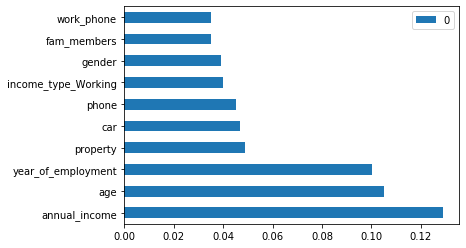

In [52]:
#5.1. Feature Importance

#5.1.1. Test on df_a set first
from sklearn.ensemble import ExtraTreesClassifier

fi = ExtraTreesClassifier()
fi_a = fi.fit(x_a_train_rs_over, y_a_train_over)

df_fi_a = pd.DataFrame(fi_a.feature_importances_,index=x_a_train_rs_over.columns)
df_fi_a.nlargest(10,df_fi_a.columns).plot(kind='barh')
plt.show()

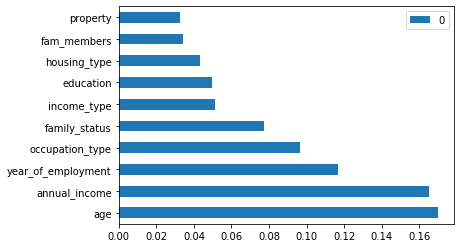

In [53]:
#5.1.2. Test on df_b set

fi_b = fi.fit(x_b_train_rs_over, y_b_train_over)

df_fi_b = pd.DataFrame(fi_b.feature_importances_,index=x_b_train_rs_over.columns)
df_fi_b.nlargest(10,df_fi_b.columns).plot(kind='barh')
plt.show()

occupation_type_Sales staff                0.010283
occupation_type_Security staff             0.012297
occupation_type_Cleaning staff             0.013300
family_status_Married                      0.013711
income_type_Working                        0.015659
housing_type_House / apartment             0.017907
age                                        0.022298
education_Secondary / secondary special    0.023078
property                                   0.034218
target                                     1.000000
Name: target, dtype: float64


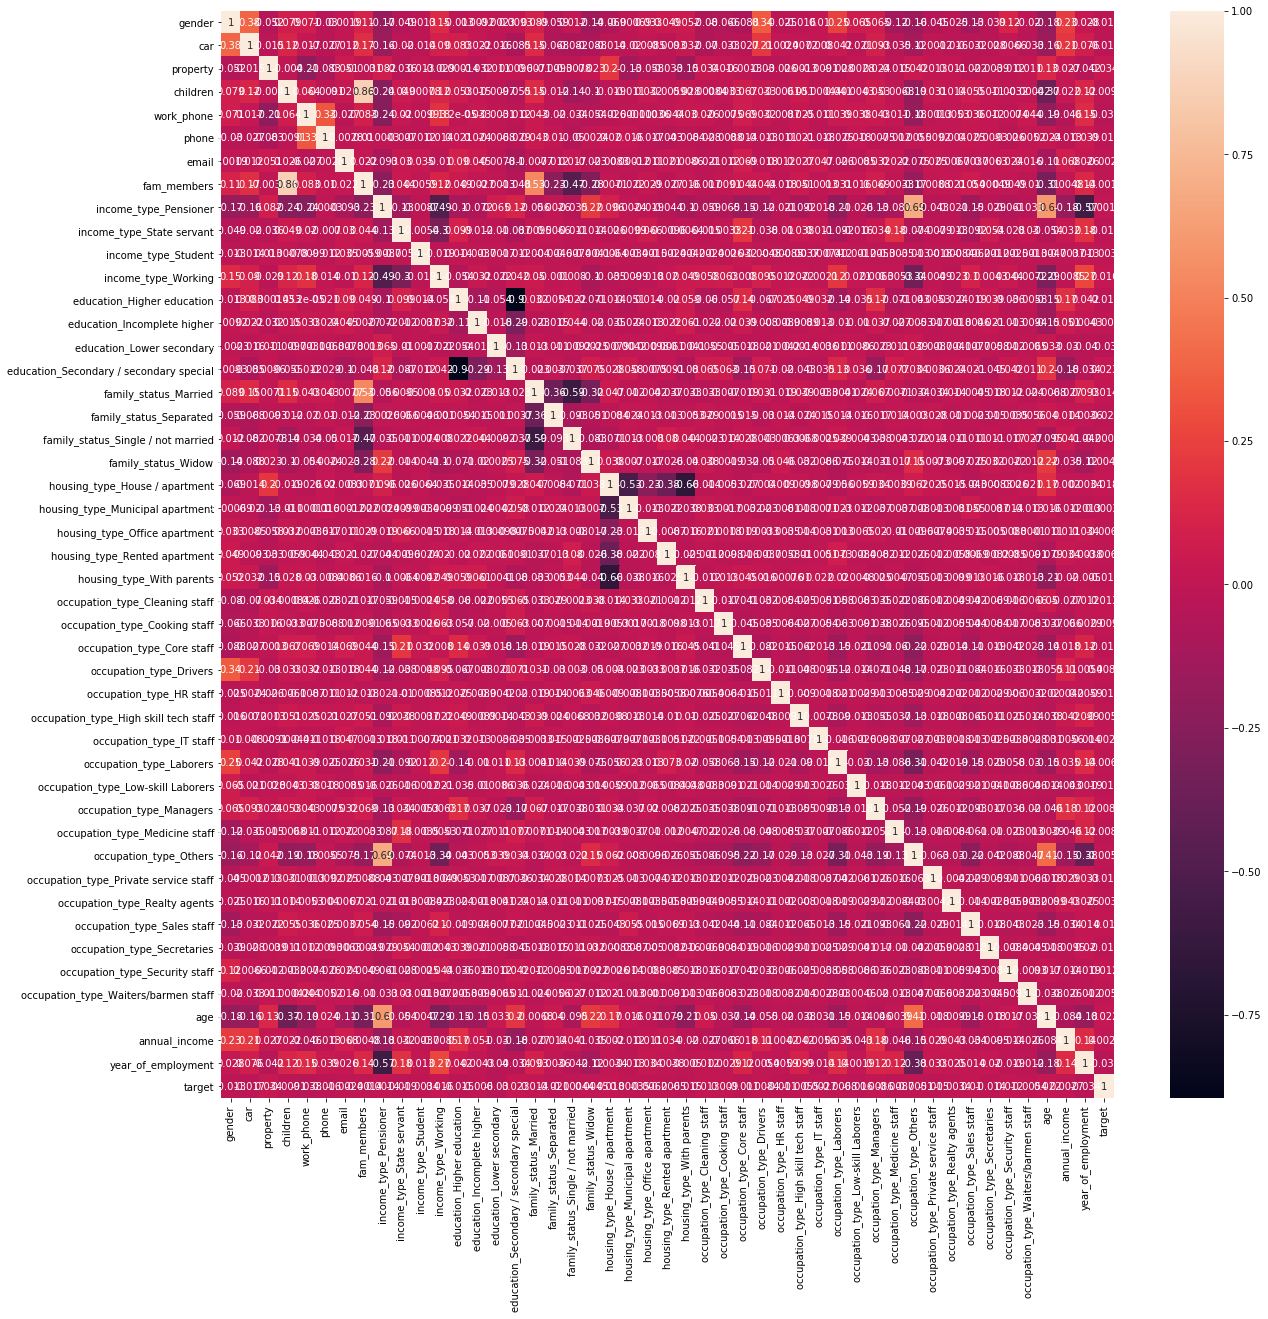

In [54]:
#5.2. Correlation Matrix

#5.2.1. Test on df_a set

df_a_train_processed = pd.concat([x_a_train_rs_over, y_a_train_over], axis=1) #combine processed features with their target

cm_a = df_a_train_processed.corr()

print(cm_a.target.sort_values().tail(10))

plt.figure(figsize=(20,20))
sns.heatmap(cm_a, xticklabels=df_a_train_processed.columns, yticklabels=df_a_train_processed.columns,annot=True)

gender             0.009039
housing_type       0.010156
age                0.012509
income_type        0.014772
car                0.018875
property           0.022670
family_status      0.023270
education          0.030477
occupation_type    0.033912
target             1.000000
Name: target, dtype: float64


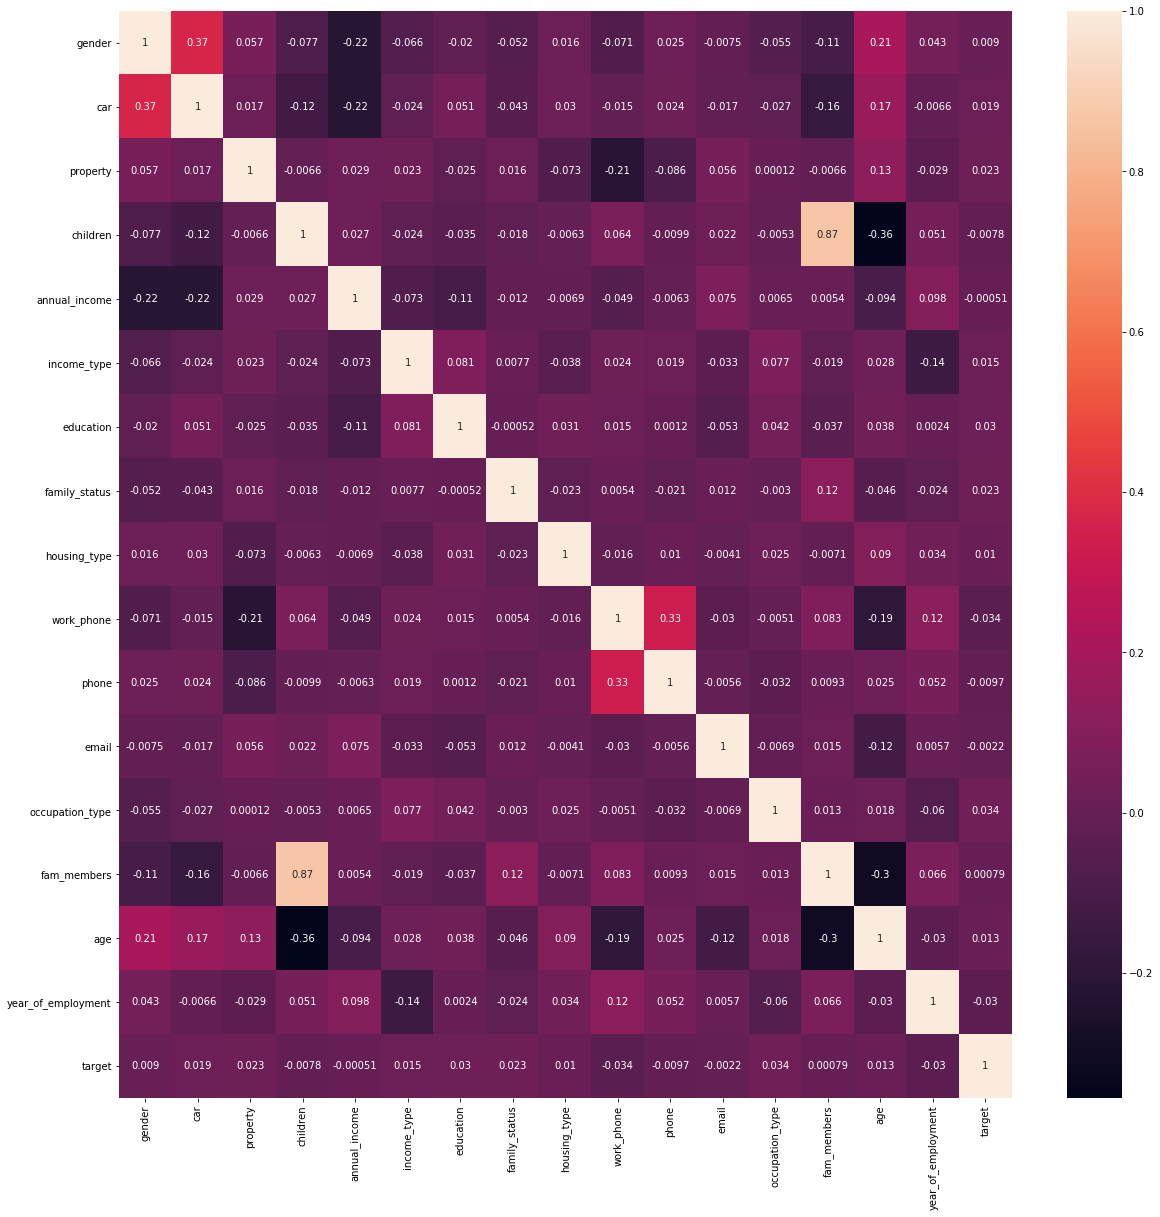

In [55]:
#5.2.2. Test on df_b set

df_b_train_processed = pd.concat([x_b_train_rs_over, y_b_train_over], axis=1) #combine processed features with their target

cm_b = df_b_train_processed.corr()

print(cm_b.target.sort_values().tail(10))

plt.figure(figsize=(20,20))
sns.heatmap(cm_b, xticklabels=df_b_train_processed.columns, yticklabels=df_b_train_processed.columns,annot=True)


24


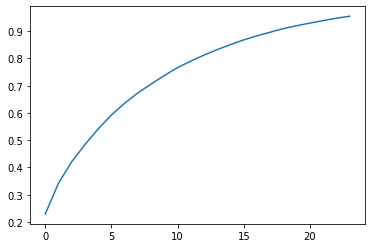

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-1.071304,1.233964,-0.133171,0.060898,0.299062,0.808156,0.540498,-0.006178,0.791027,0.018384,...,-0.250390,-0.177445,0.080802,0.071569,-0.024985,-0.086389,0.031688,-0.048009,0.043292,-0.012256
1,-1.001658,1.525235,-0.250942,-0.119962,-0.017210,0.486879,-0.069360,0.689938,0.009944,-0.316562,...,-0.174308,-0.064077,-0.118147,0.028035,0.020150,-0.076983,0.028687,-0.071397,-0.089642,-0.009722
2,2.323297,0.911653,1.145837,-0.199079,0.139141,-0.447826,-0.184519,0.039541,0.406531,0.285222,...,0.062683,0.268342,-0.182088,0.539378,-0.552434,-0.288268,-0.025710,-0.163149,-0.055305,-0.132328
3,-0.680950,-1.607538,-0.492156,0.093317,0.817839,0.629138,0.239946,-0.593722,0.628562,0.646769,...,0.765888,0.226807,-0.410379,0.121348,-0.169082,0.147812,0.023245,-0.202463,0.038836,0.988245
4,0.035304,-0.445761,-0.813555,-0.709966,0.021800,0.333992,-0.638263,0.734689,-0.360419,-0.044628,...,-0.652388,0.410842,0.092750,-0.277575,0.114654,-0.216170,-0.089800,-0.028454,0.060245,-0.051765


In [56]:
#5.3. Dimensionality Reduction (Component-based): PCA 
#PCA groups variables by their correlations, and each group is condisidered as a factor
#PCA creates a new set of variables with a smaller set of factors that are uncorrelated
#in such a way that 1st PC explains maximum variance, followed by 2nd and so on (n_components)

#5.3.1. PCA on df_a set

df_a_train_processed.shape

from sklearn.decomposition import PCA

pca = PCA(.95)

pca_a_train = pca.fit(x_a_train_rs_over, y_a_train_over)
print(pca_a_train.n_components_)

plt.plot(np.cumsum(pca_a_train.explained_variance_ratio_))
plt.show()

x_a_train_rs_over_pca = pd.DataFrame(pca_a_train.transform(x_a_train_rs_over))
x_a_train_rs_over_pca.head()


In [57]:
#5.4. Dimensionality Reduction (Projection-based): t-SNE or UMAP
#t-SNE works well for large dataset but its proven limitations are low computing time and large-scale information loss
#UMAP is proven to have shorter runtime while preserving information 

#UMAP first calculates the distance between the points in high dimensional space, projects them onto the low 
#dimensional space, and calculates the distance between points in this low dimensional space. 
#It then uses Stochastic Gradient Descent to minimize the difference between these distances.

import umap

um = umap.UMAP(n_components=24)

umap_a_train = um.fit_transform(x_a_train_rs_over)

In [58]:
x_a_train_rs_over_umap = pd.DataFrame(umap_a_train)
x_a_train_rs_over_umap.head()

#UMAP has a higher computing time than PCA, so for the sake of this project, we use PCA prior to modeling

,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,7.475308,2.332857,5.387123,3.563406,3.445006,0.860465,5.996707,1.662284,6.988964,3.674960,...,8.966265,8.392026,0.157608,6.099502,7.011345,1.943426,2.025922,7.528153,5.297375,5.984402
1,7.528584,1.049540,8.991973,3.405102,3.940156,4.053485,6.144457,2.094659,5.176898,5.439480,...,8.478038,8.769208,-1.840600,5.198187,10.702653,3.480049,2.833250,10.986854,4.551935,2.702973
2,4.816594,1.450822,3.480088,4.764229,4.335071,5.800674,3.113608,3.100495,4.523953,5.529006,...,5.057641,4.973793,3.537945,3.691330,8.126164,4.855846,3.083796,4.451480,1.649001,2.932656
3,5.618531,2.988688,3.454508,2.868979,3.319537,5.237559,4.469516,5.119345,3.062969,6.867819,...,4.821316,4.289899,2.406607,4.219610,4.282863,-0.656001,2.267646,5.867287,6.963938,6.145278
4,3.518624,1.636358,1.822519,4.642423,7.209929,8.133946,5.687993,6.720469,5.284186,3.852000,...,3.271946,5.607829,6.699094,4.726881,5.939833,3.001617,3.859066,8.097745,8.132785,2.068356


In [59]:
#Apply PCA on x_test set

pca_a_test = pca.fit(x_a_test_rs, y_a_test)
print(pca_a_test.n_components_)

x_a_test_rs_pca = pd.DataFrame(pca_a_test.transform(x_a_test_rs))
x_a_test_rs_pca.head()

24


,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
0,-0.501984,-0.099571,-0.557037,-0.514249,-0.078398,0.097999,-0.111230,0.756444,-0.405101,-0.396372,...,-0.548413,-0.299773,0.289079,0.175132,0.830566,-0.056112,-0.070909,0.416214,0.152913,-0.054363
1,0.041244,-0.952056,-0.871614,0.489550,-0.750071,-0.691347,0.585800,0.221524,0.214543,-0.328891,...,-0.001267,-0.045695,-0.036472,-0.164890,0.156120,-0.126942,-0.052711,0.032977,0.018864,0.017837
2,-0.157593,-0.158182,-0.253260,0.916727,0.365687,-0.592662,-0.190696,0.475115,-0.426198,-0.368983,...,0.132071,-0.452789,-0.109063,-0.368486,0.128945,-0.134756,-0.399565,0.412193,-0.061220,-0.014937
3,-1.926850,1.052464,-0.236538,-0.395702,0.417299,-0.146028,0.354755,-0.429507,0.644089,0.069490,...,-0.162133,0.034214,0.388961,0.005324,-0.028655,-0.100396,0.055240,0.033231,0.725325,0.126355
4,-0.971043,1.505699,0.032900,0.193425,-0.136009,0.140848,-0.182684,-0.125858,-0.206976,-0.233301,...,0.089706,0.110597,0.075076,0.532214,0.776578,-0.046754,0.035470,0.064407,-0.098889,-0.057453


In [60]:
# Apply PCA on df_b train set

pca_b_train = pca.fit(x_b_train_rs_over, y_b_train_over)
print(pca_b_train.n_components_)

x_b_train_rs_over_pca = pd.DataFrame(pca_b_train.transform(x_b_train_rs_over))
x_b_train_rs_over_pca.head()

11


,0,1,2,3,4,5,6,7,8,9,10
0,0.437418,-0.621581,0.036949,-0.691844,-0.421001,-0.184682,0.033900,0.672060,0.880236,-0.355494,-0.732681
1,0.438748,-0.706740,0.049280,-0.752121,-0.844357,-0.028480,-0.054725,0.104990,0.077844,-0.817723,-0.019555
2,-0.351566,2.224132,0.810124,-0.885760,-0.146771,0.958229,-0.324729,-0.230372,0.295195,-0.020373,-0.505255
3,0.637756,-0.617125,-0.639113,0.437056,0.386055,-0.912030,1.070785,-0.142454,0.493438,1.059417,0.028635
4,0.752376,-0.136602,0.265176,0.199401,-0.819283,-0.408407,0.885489,-0.566522,-0.546028,-0.462572,-0.163557


In [61]:
# Apply PCA on df_b test set

pca_b_test = pca.fit(x_b_test_rs, y_b_test)
print(pca_b_test.n_components_)

x_b_test_rs_pca = pd.DataFrame(pca_b_test.transform(x_b_test_rs))
x_b_test_rs_pca.head()

10


,0,1,2,3,4,5,6,7,8,9
0,0.573742,0.223828,-0.507043,-0.248753,-0.352590,-0.306093,0.138319,0.524290,-0.005757,-0.530025
1,0.172015,0.110614,-0.323361,1.118091,-0.164654,0.578821,-0.509699,1.005916,-0.015789,0.187357
2,0.549958,0.084066,-0.334961,-0.546510,0.652463,0.009754,-0.736871,0.385362,0.568707,-0.456906
3,-0.468431,1.511746,-1.168571,-0.736469,-0.804989,0.050332,-0.175676,-0.020367,-0.255446,0.785856
4,-0.432617,1.255284,-0.353443,-0.707662,-0.153290,-0.638657,0.067154,-0.033053,-0.216221,-0.108476


In [62]:
#6. Apply algorithm 
# Models to be tested: Logistic Regression, KNearest, SVM, Decision Tree, Random Forest, XGBoost, LightGBM

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [63]:
classifiers = {
    "LogisticRegression" : LogisticRegression(),
    "KNeighbors" : KNeighborsClassifier(),
    "SVC" : SVC(),
    "DecisionTree" : DecisionTreeClassifier(),
    "RandomForest" : RandomForestClassifier()
}

In [64]:
#6.1. Modelling across different classifiers

In [65]:
#Compute the training score of each models (R-squared)

train_scores = []
test_scores = []

for key, classifier in classifiers.items():
    classifier.fit(x_a_train_rs_over_pca, y_a_train_over)
    train_score = round(classifier.score(x_a_train_rs_over_pca, y_a_train_over),2)
    train_scores.append(train_score)
    test_score = round(classifier.score(x_a_test_rs_pca, y_a_test),2)
    test_scores.append(test_score)

print(train_scores)
print(test_scores)

[0.53, 0.78, 0.7, 0.85, 0.85]
[0.49, 0.53, 0.54, 0.51, 0.5]


In [66]:
#After testing, resampling (both undersampling and oversampling) negatively impacted the modelling score
#As such, we will remove the resampling and apply PCA directly on the scaled dataset instead

In [67]:
#PCA on df_a set
x_a_train_rs_pca = pd.DataFrame(PCA(n_components=24).fit_transform(x_a_train_rs, y_a_train))
x_a_test_rs_pca = pd.DataFrame(PCA(n_components=24).fit_transform(x_a_test_rs, y_a_test))

#PCA on df_b set
x_b_train_rs_pca = pd.DataFrame(PCA(n_components=11).fit_transform(x_b_train_rs, y_b_train))
x_b_test_rs_pca = pd.DataFrame(PCA(n_components=11).fit_transform(x_b_test_rs, y_b_test))

In [68]:
#Retrain the model on df_a set

a_train_scores = []
a_test_scores = []

for key, classifier in classifiers.items():
    classifier.fit(x_a_train_rs_pca, y_a_train)
    train_score = round(classifier.score(x_a_train_rs_pca, y_a_train),2)
    a_train_scores.append(train_score)
    test_score = round(classifier.score(x_a_test_rs_pca, y_a_test),2)
    a_test_scores.append(test_score)

print(a_train_scores)
print(a_test_scores)

[0.76, 0.78, 0.76, 0.83, 0.83]
[0.75, 0.69, 0.75, 0.65, 0.76]


In [69]:
#Train the model on df_b set

b_train_scores = []
b_test_scores = []

for key, classifier in classifiers.items():
    classifier.fit(x_b_train_rs_pca, y_b_train)
    train_score = round(classifier.score(x_b_train_rs_pca, y_b_train),2)
    b_train_scores.append(train_score)
    test_score = round(classifier.score(x_b_test_rs_pca, y_b_test),2)
    b_test_scores.append(test_score)

print(b_train_scores)
print(b_test_scores)

[0.76, 0.8, 0.76, 0.85, 0.85]
[0.75, 0.69, 0.75, 0.65, 0.75]


In [70]:
#Modelling score has improved after removing resampling bit (on both df_a and df_b set)
#However, we have not achieved the best accuracy score as we expect (>90%)

In [71]:
#Try UMAP on the dataset instead to see if the score improves
#However, no improvement was seen yet it cost our memory for  longer runtime

In [72]:
#We also traced back to different scalers (SS, MM), to see if changing the scaler might improve the score or not
#But no improvement was seen, meaning scalers did not impact the modelling score

In [73]:
#6.2. Hyperparameter Tuning

In [74]:
#Use GridSearchCV to find the best parameters

from sklearn.model_selection import GridSearchCV

#Logistic Regression
lr = LogisticRegression()
lr_params = {"penalty": ['l1', 'l2'], "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                  "solver": ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
grid_logistic = GridSearchCV(lr, lr_params)
grid_logistic.fit(x_a_train_rs_pca, y_a_train)
grid_logistic.best_estimator_


/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/miniconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on 

LogisticRegression(C=0.001, penalty='l1', solver='liblinear')

In [75]:
lr_best = LogisticRegression(C=0.001, penalty='l1', solver='liblinear')
lr_best.fit(x_a_train_rs_pca, y_a_train)
lr_best.score(x_a_train_rs_pca, y_a_train)

0.7591349739000746

In [76]:
#K Nearest Neighbors

knear = KNeighborsClassifier()
knear_params = {"n_neighbors": list(range(2,7,1)), "algorithm": ['auto', 'ball_tree', 'kd_tree', 'brutle']}
grid_knear = GridSearchCV(knear, knear_params)
grid_knear.fit(x_a_train_rs_pca, y_a_train)
grid_knear.best_estimator_

/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/miniconda3/lib/python3.7/site-packages/sklearn/neighbors/_base.py", line 1157, in fit
    return self._fit(X)
  File "/opt/miniconda3/lib/python3.7/site-packages/sklearn/neighbors/_base.py", line 350, in _fit
    self._check_algorithm_metric()
  File "/opt/miniconda3/lib/python3.7/site-packages/sklearn/neighbors/_base.py", line 310, in _check_algorithm_metric
    raise ValueError("unrecognized algorithm: '%s'" % self.algorithm)
ValueError: unrecognized algorithm: 'brutle'

  FitFailedWarning)
/opt/miniconda3/lib/python3.7/site-packages/sklearn/model_selecti

KNeighborsClassifier(n_neighbors=2)

In [77]:
knear_best = KNeighborsClassifier(n_neighbors=2)
knear_best.fit(x_a_train_rs_pca, y_a_train)
knear_best.score(x_a_train_rs_pca, y_a_train)

0.798699146573867

In [79]:
#SVC

svc = SVC()
svc_params = {"C": [0.5, 0.7, 0.9, 1], "kernel":['rbf', 'poly', 'sigmoid', 'linear']}
grid_svc = GridSearchCV(svc, svc_params)
grid_svc.fit(x_a_train_rs_pca, y_a_train)
grid_svc.best_estimator_

In [ ]:
svc_best = SVC(#pass the best estimator in)
svc_best.fit(x_a_train_rs_pca, y_a_train)
svc_best.score(x_a_train_rs_pca, y_a_train)

In [ ]:
#Decision Tree

tree = DecisionTreeClassifier()
tree_params = {"criterion": ['gini', 'entropy'], "max_depth":list(range(2,5,1)), "min_samples_leaf":list(range(5,7,1))}
grid_tree = GridSearchCV(tree, tree_params)
grid_tree.fit(x_a_train_rs_pca, y_a_train)
grid_tree.best_estimator_

In [ ]:
tree_best = DecisionTreeClassifier(#pass the best estimator in)
tree_best.fit(x_a_train_rs_pca, y_a_train)
tree_best.score(x_a_train_rs_pca, y_a_train)

In [ ]:
#7. Advanced Machine Learning Model: XGBoost, LightGBM

In [80]:
import xgboost as xgb

xgb_model = xgb.XGBClassifier()
xgb_model.fit(x_a_train_rs_pca, y_a_train)
xgb_model.score(x_a_train_rs_pca, y_a_train)


/opt/miniconda3/lib/python3.7/site-packages/dask/config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
/opt/miniconda3/lib/python3.7/site-packages/dask/dataframe/utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


0.8107133979617202

In [81]:
import lightgbm as lgb

lgb_model = lgb.LGBMClassifier()
lgb_model.fit(x_a_train_rs_pca, y_a_train)
lgb_model.score(x_a_train_rs_pca, y_a_train)

0.7806777694920871